In [2]:
%matplotlib inline
import os 
import nibabel as nb 
import numpy as np 
import nipype.interfaces.freesurfer as fs
import matplotlib as mpl
import matplotlib.pyplot as plt
from nilearn import datasets
from nilearn import plotting
from nilearn.plotting.surf_plotting import load_surf_mesh
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


# variance explained by gradients

In [3]:
# get results dictionary including eigenvalues
results = np.load('/data/pt_mar006/components/embedding_dense_res_300.npy')
#results.item()

In [4]:
# eigenvalues
eig_val = results.item()['lambdas']
# percentage of varience per eigenvector
perc_var = eig_val / np.sum(eig_val)*100


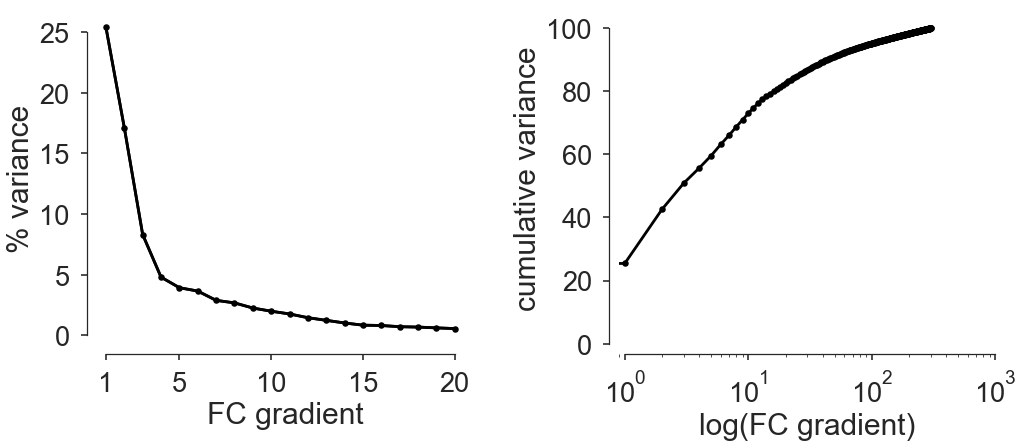

In [5]:
sns.set_context('poster', font_scale=1.7)
sns.set_style("ticks")
fig=plt.figure(figsize=(15,7))

ax1 = fig.add_subplot(121)
nums = np.arange(20)
nums = nums +1 
plt.plot(nums, perc_var[0:20], color='black')
plt.plot(nums, perc_var[0:20], color='black', marker='.', markersize=13)
plt.xlim([0.5, 21])
plt.xticks([1, 5, 10, 15, 20])
plt.ylabel('% variance')
plt.xlabel('FC gradient')

ax2 = fig.add_subplot(122)
vals = np.cumsum(perc_var)
vals = np.hstack((0,vals))
ax2.semilogx(vals, marker='.', color='k', markersize=13)
plt.ylim([0, 105])
plt.xlim([0.9, 1000])
plt.ylabel('cumulative variance')
plt.xlabel('log(FC gradient)')


sns.despine(offset=10, trim=True)
fig.tight_layout()
sns.set()